In [1]:
import glob
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import nc_tools, places

%matplotlib inline

In [2]:
def get_model_biol(filenames, biol_type, ij):
    i, j = ij[0], ij[1]
    fileset = sorted(glob.glob(filenames))
    with nc.Dataset(fileset[0]) as h:
        model_units = h.variables['time_counter'].units
    with nc_tools.scDataset(fileset) as h:
        biol = h.variables[biol_type][:, 0:20, i, j]
        time = h.variables['time_counter'][:]
    converted_times = nc.num2date(time, model_units)
    return biol, converted_times

In [11]:
def plot_comparison(place):
    diatoms_base, times_base = get_model_biol(
        '/data/sallen/results/MEOPAR/uzoo_base/*/SalishSea_1d*ptrc*.nc',
        'diatoms', places.PLACES[place]['NEMO grid ji'])
    flags_base, times_base = get_model_biol(
        '/data/sallen/results/MEOPAR/uzoo_base/*/SalishSea_1d*ptrc*.nc',
        'flagellates', places.PLACES[place]['NEMO grid ji'])
    uzoo_base, times_base = get_model_biol(
        '/data/sallen/results/MEOPAR/uzoo_base/*/SalishSea_1d*ptrc*.nc',
        'microzooplankton', places.PLACES[place]['NEMO grid ji'])

    diatoms_fast, times_fast = get_model_biol(
        '/data/sallen/results/MEOPAR/uzoo_fast/*/SalishSea_1d*ptrc*.nc',
        'diatoms', places.PLACES[place]['NEMO grid ji'])
    flags_fast, times_fast = get_model_biol(
        '/data/sallen/results/MEOPAR/uzoo_fast/*/SalishSea_1d*ptrc*.nc',
        'flagellates', places.PLACES[place]['NEMO grid ji'])
    uzoo_fast, times_fast = get_model_biol(
        '/data/sallen/results/MEOPAR/uzoo_fast/*/SalishSea_1d*ptrc*.nc',
        'microzooplankton', places.PLACES[place]['NEMO grid ji'])

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(
        times_base, np.max(diatoms_base[:, :], axis=1), label='Base - Diatoms')
    ax.plot(
        times_fast, np.max(diatoms_fast[:, :], axis=1), label='Fast - Diatoms')
    ax.plot(times_base, np.max(flags_base[:, :], axis=1), label='Base - Flags')
    ax.plot(times_fast, np.max(flags_fast[:, :], axis=1), label='Fast - Flags')
    ax.plot(times_base, np.max(uzoo_base[:, :], axis=1), label='Base - uZoo')
    ax.plot(times_fast, np.max(uzoo_fast[:, :], axis=1), label='Fast - uZoo')
    ax.set_title(place)
    ax.legend(loc='upper left')
    ax.grid()
    return fig, ax

## S3 ##

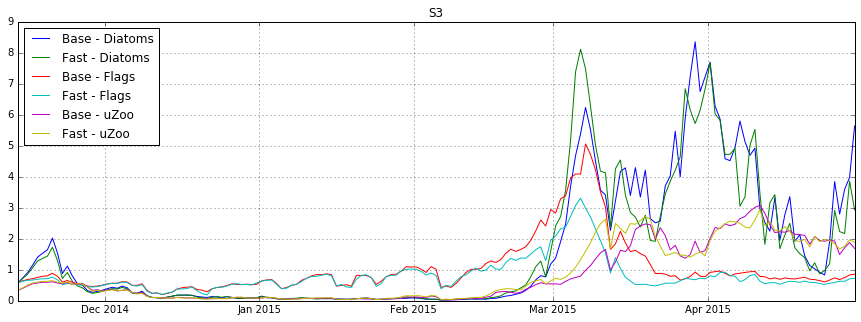

In [13]:
fig, ax = plot_comparison('S3')

## Sentry Shoal ##

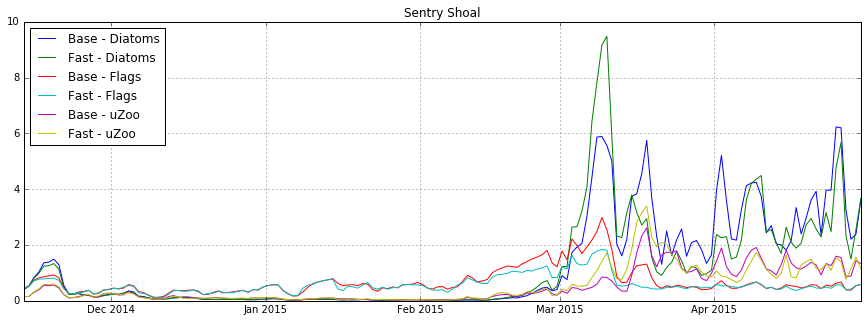

In [16]:
fig, ax = plot_comparison('Sentry Shoal')

## Cluster 8 ##

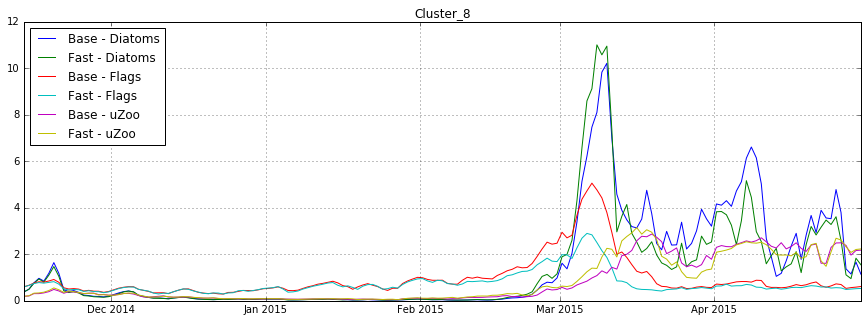

In [14]:
fig, ax = plot_comparison('Cluster_8')

In [7]:
print(places.PLACES['Cluster_1']['lon lat'])
print(places.PLACES['Cluster_2']['lon lat'])
print(places.PLACES['Cluster_3']['lon lat'])
print(places.PLACES['Cluster_4']['lon lat'])
print(places.PLACES['Cluster_5']['lon lat'])
print(places.PLACES['Cluster_6']['lon lat'])
print(places.PLACES['Cluster_7']['lon lat'])
print(places.PLACES['Cluster_8']['lon lat'])
print(places.PLACES['Cluster_9']['lon lat'])

(48.215, -123.099)
(48.261, -123.717)
(48.899, -123.138)
(48.555, -122.75)
(48.735, -123.135)
(48.249, -124.11)
(49.317, -123.801)
(49.726, -124.679)
(49.101, -123.249)
